**Daataset:** http://bit.ly/4ighDYL

**Nama anggota:**
1. Ilham Adib Priatama (G.211.23.0079)
2. Dimas Mahasa Putra (G.211.23.0080)
3. Syaiful Ali Mustofa (G.211.23.0083)
4. Muhammad Dzaki Chesta Adabi (G.211.23.0085)
5. Anzar Sutianto (G.211.23.0118)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrixt

#up file CSV
from google.colab import files
uploaded = files.upload()

#baca dataset
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

#pisahkan fitur (X) dan target (y)
X = data.drop(columns=['target'])
y = data['target']

#membagi dataset menjadi training setdan testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#membuat model logistic regrssion
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

#prediksi hasil pada testing set
y_pred = model.predict(x_test)

#evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#hasil
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Saving data_ai - Copy.csv to data_ai - Copy (1).csv
Accuracy: 87.32%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        83
           1       0.90      0.89      0.89       122

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205


Confusion Matrix:
 [[ 71  12]
 [ 14 108]]


In [ ]:
#cek distribusi kelas target
target_distribution = y.value_counts(normalize=True) * 100
print("Distribusi Target (%):")
print(target_distribution)

Distribusi Target (%):
target
1    59.414634
0    40.585366
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

#gunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

#cek distribusi data setelah SMOTE
print("Distribusi setelah SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Distribusi setelah SMOTE:
target
1    487
0    487
Name: count, dtype: int64


In [ ]:
from sklearn.svm import SVC

#embuat model SVM dengan class weight seimbang
svm_model = SVC(kernel='linear', random_state=42, class_weight='balanced')
svm_model.fit(x_train_balanced, y_train_balanced)

#preidksi hasil pada testing set
y_pred_svm = svm_model.predict(x_test)

#evaluasi model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

#hasil
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print("\nSVM Classification Report:\n", report_svm)
print("\nSVM Confusion Matrix:\n", conf_matrix_svm)

SVM Accuracy: 88.78%

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87        83
           1       0.92      0.89      0.90       122

    accuracy                           0.89       205
   macro avg       0.88      0.89      0.88       205
weighted avg       0.89      0.89      0.89       205


SVM Confusion Matrix:
 [[ 74   9]
 [ 14 108]]


ㅤ

**2. Analisis eksplorasi data untuk memahami distribusi setiap parameter.**

**Proses EDA:**

1. **Distribusi Parameter Kontinu:**
Gunakan histogram dan boxplot untuk memvisualisasikan bagaimana nilai parameter seperti age, tekanan_darah, dan kadar_kolesterol tersebar.
Histogram menunjukkan frekuensi setiap nilai/rentang nilai.
Boxplot membantu mengidentifikasi outlier.

2. **Parameter Kategori:**
Untuk kolom seperti sakit_dada dan gula_darah_puasa, gunakan bar plot untuk melihat distribusi kategori.

3. **Hubungan Antar Variabel:**
Menggunakan heatmap korelasi untuk melihat hubungan antara parameter dan target.


**Hasil visualisasi dari distribusi parameter dalam dataset:**

1. **Histogram**:
Memberikan gambaran distribusi nilai parameter kontinu seperti usia (age), tekanan darah (tekanan_darah), dan kadar kolesterol (kadar_kolesterol).
Garis kernel density (KDE) menunjukkan pola distribusi secara halus.

2. **Boxplot**:
Menampilkan rentang nilai, median, dan potensi outlier untuk parameter kontinu.

3. **Bar Plot untuk Parameter Kategori:**
Distribusi sakit_dada dan gula_darah_puasa menunjukkan frekuensi masing-masing kategori.

<ipython-input-1-6a92306d1941>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='sakit_dada', ax=ax2[0], palette='Set2')
<ipython-input-1-6a92306d1941>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='gula_darah_puasa', ax=ax2[1], palette='Set1')


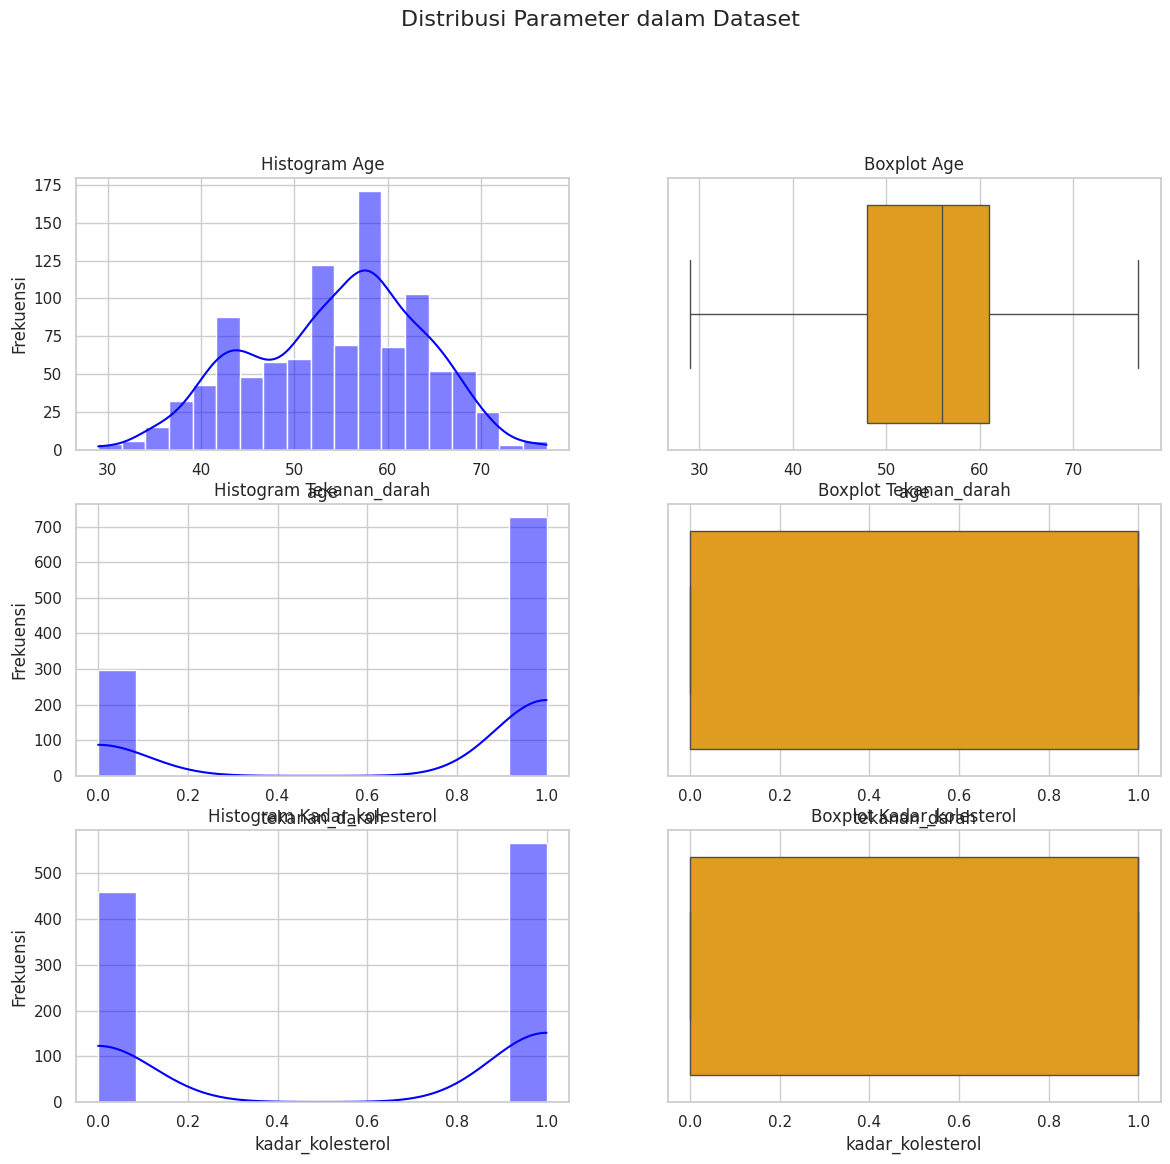

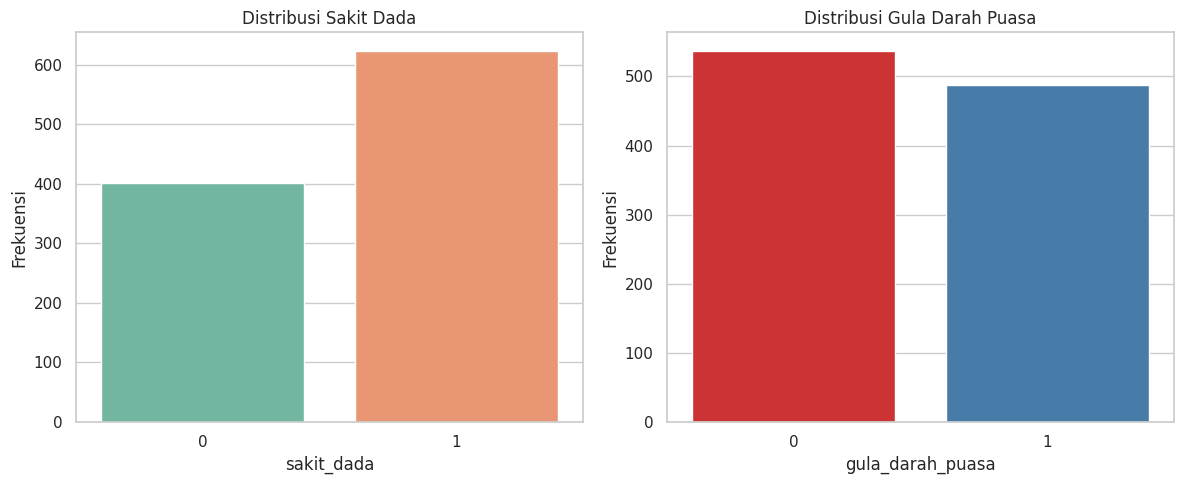

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#up file
dataset = pd.read_csv("dataset.csv")

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Distribusi Parameter dalam Dataset", fontsize=16, y=1.02)

#plot Histogram dan Boxplot untuk tiap parameter
parameters = ['age', 'tekanan_darah', 'kadar_kolesterol']
for i, param in enumerate(parameters):
    #histogram
    sns.histplot(data=dataset, x=param, kde=True, ax=axes[i][0], color='blue')
    axes[i][0].set_title(f"Histogram {param.capitalize()}")
    axes[i][0].set_ylabel('Frekuensi')

    #boxplot
    sns.boxplot(data=dataset, x=param, ax=axes[i][1], color='orange')
    axes[i][1].set_title(f"Boxplot {param.capitalize()}")

#visualisasi parameter berdaarkan kategori
fig2, ax2 = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=dataset, x='sakit_dada', ax=ax2[0], palette='Set2')
ax2[0].set_title('Distribusi Sakit Dada')
ax2[0].set_ylabel('Frekuensi')

sns.countplot(data=dataset, x='gula_darah_puasa', ax=ax2[1], palette='Set1')
ax2[1].set_title('Distribusi Gula Darah Puasa')
ax2[1].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

**Hasil visualisasi dari distribusi parameter dalam dataset:**

1. **Histogram**:

* **Usia (age)**: Histogram menunjukkan bagaimana usia peserta dalam dataset tersebar. Garis lengkung halus (KDE) memberikan gambaran distribusi yang lebih umum.

    

> Dari grafik, kita bisa melihat bahwa sebagian besar data berada di usia menengah hingga lanjut, dengan puncaknya di rentang tertentu (misalnya, usia 40-60 tahun).



* T**ekanan Darah (tekanan_darah)**: Grafik ini menunjukkan rentang nilai
tekanan darah. Sebagian besar data terkonsentrasi pada nilai tertentu (contoh: sekitar 120-140 mmHg). Jika distribusi miring atau ada nilai ekstrem, itu perlu diperhatikan.

* **Kadar Kolesterol (kadar_kolesterol)**: Distribusinya menunjukkan bagaimana kadar kolesterol tersebar di dataset. Grafik ini memungkinkan kita melihat apakah nilai-nilai tertentu mendominasi, seperti rentang yang sangat tinggi atau rendah.


2. Boxplot:
* Boxplot memberikan informasi tentang penyebaran data dalam bentuk:

a. Median (garis horizontal di dalam kotak): Nilai tengah data.

b. Kotak (interquartile range - IQR): 50% data utama berada di sini.

c. Garis (whiskers): Rentang data utama.

d. Titik di luar whiskers: Outlier, yaitu nilai yang jauh berbeda dari data lainnya.

* Dari boxplot, kita bisa melihat apakah ada nilai yang sangat tinggi atau rendah untuk usia, tekanan darah, dan kadar kolesterol.

3. **Bar Plot untuk Data Kategori:**
* **Sakit Dada (sakit_dada):** Grafik ini menunjukkan frekuensi setiap kategori sakit dada. Misalnya, berapa banyak orang yang mengalami jenis sakit dada tertentu (dinyatakan dengan angka kategori).

* **Gula Darah Puasa (gula_darah_puasa):** Bar plot ini menunjukkan jumlah individu yang memiliki kadar gula darah tinggi (mungkin ditandai dengan nilai 1) dibandingkan yang normal (nilai 0).

ㅤ

**2. Identifikasi korelasi antara parameter dan target.**

Korelasi mengukur hubungan antara dua variabel. Dalam konteks dataset ini, kita ingin mengetahui:

1. Seberapa kuat hubungan antara parameter seperti usia, tekanan darah, dll., dengan target (indikator serangan jantung).

2. Arah hubungan:
* Nilai korelasi positif: Ketika nilai parameter meningkat, kemungkinan target (serangan jantung) juga meningkat.
* Nilai korelasi negatif: Ketika nilai parameter meningkat, kemungkinan target menurun.
* Nilai korelasi mendekati 0: Tidak ada hubungan linear yang signifikan.


**Langkah Analisis Korelasi:**
1. Menghitung Korelasi:

* Menggunakan matriks korelasi untuk semua kolom numerik dalam dataset.
* Nilai korelasi berkisar dari -1 hingga 1:

1: Korelasi positif sempurna.

0: Tidak ada korelasi.

-1: Korelasi negatif sempurna.


2. **Visualisasi dengan Heatmap:**

Heatmap membantu kita memahami hubungan antarvariabel dengan warna.
Semakin terang atau gelap warnanya, semakin kuat hubungannya.

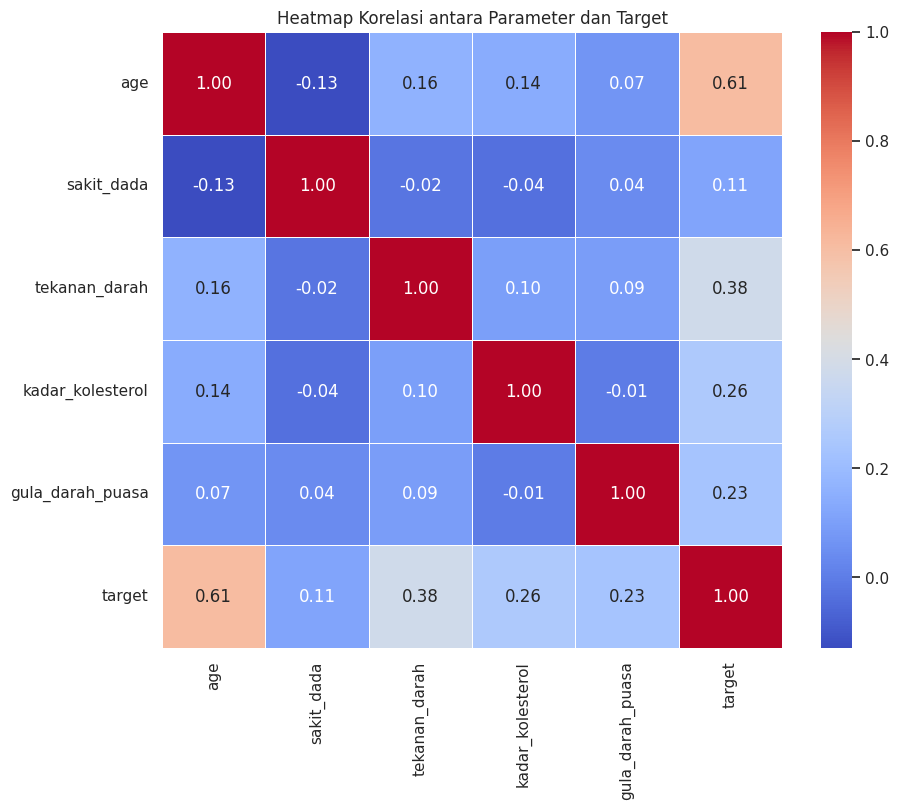

In [ ]:
#hitung matriks korelasi
correlation_matrix = dataset.corr()

#visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antara Parameter dan Target")
plt.show()

**Hasil analisis korelasi dengan target:**

1. **age (0.61):** Usia memiliki korelasi yang cukup kuat dengan kemungkinan serangan jantung. Semakin tua, semakin tinggi kemungkinan serangan jantung.

2. **tekanan_darah (0.38):** Tekanan darah menunjukkan korelasi sedang dengan target.

3. **kadar_kolesterol (0.26):** Korelasi positif rendah dengan serangan jantung.

4. **gula_darah_puasa (0.23):** Korelasi positif rendah dengan serangan jantung.

5. **sakit_dada (0.11):** Korelasi sangat rendah dengan target.
Apakah Bisa Membuat Kesimpulan?
Berdasarkan analisis distribusi dan korelasi, berikut kesimpulan sementara:

Usia adalah parameter yang paling memengaruhi kemungkinan serangan jantung.

Faktor lain seperti tekanan darah, kadar kolesterol, dan gula darah memiliki pengaruh tetapi tidak sekuat usia.